# Descriptive stats for SAMueL-2 data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('./data/data_for_models.csv', low_memory=False)


## Onset known

Proportion known stroke onset times - all stroke

In [2]:
onset_known = data['onset_known'].mean()
precise_onset = data['precise_onset_known'].mean()
estimated_onset = onset_known - precise_onset
all_onset_known = onset_known

print (f'Proportion onset known {onset_known:.3f}')
print (f'Proportion onset known precisely {precise_onset:.3f}')
print (f'Proportion onset known imprecisely {estimated_onset:.3f}')

Proportion onset known 0.670
Proportion onset known precisely 0.336
Proportion onset known imprecisely 0.334


Proportion known stroke onset times - ischaemic stroke

In [3]:
mask = data['infarction'] == 1
onset_known = data[mask]['onset_known'].mean()
precise_onset = data[mask]['precise_onset_known'].mean()
estimated_onset = onset_known - precise_onset
ischaemic_onset_known = onset_known

print (f'Proportion onset known {onset_known:.3f}')
print (f'Proportion onset known precisely {precise_onset:.3f}')
print (f'Proportion onset known imprecisely {estimated_onset:.3f}')

Proportion onset known 0.669
Proportion onset known precisely 0.335
Proportion onset known imprecisely 0.334


Proportion known stroke onset times - haemorrhagic stroke

In [4]:
mask = data['infarction'] == 0
onset_known = data[mask]['onset_known'].mean()
precise_onset = data[mask]['precise_onset_known'].mean()
estimated_onset = onset_known - precise_onset
haemorrhagic_onset_known = onset_known

print (f'Proportion onset known {onset_known:.3f}')
print (f'Proportion onset known precisely {precise_onset:.3f}')
print (f'Proportion onset known imprecisely {estimated_onset:.3f}')

Proportion onset known 0.679
Proportion onset known precisely 0.343
Proportion onset known imprecisely 0.335


## Onset to arrival times

All stroke

In [5]:
mask = data['onset_known'] == 1
known_onset_data = data[mask]
bins = np.arange(0, 481, 15)
bins = np.append(bins, 99999)
results = pd.DataFrame(index = bins[1:])

### All stroke

In [6]:
binned_times = pd.cut(known_onset_data['onset_to_arrival_time'], bins, include_lowest=True)
counts = binned_times.value_counts().sort_index()
counts_percent = (counts / counts.sum()) * 100
counts_percent = counts_percent.cumsum()
counts_percent.index = bins[1:]
all_arrival_times = counts_percent
results['all_stroke_all_arrivals'] = all_arrival_times * all_onset_known
results['all_stroke_known_onset_arrivals']  = all_arrival_times

counts_percent

15         0.425005
30         1.229685
45         3.379660
60         8.506329
75        15.581283
90        22.893691
105       29.407239
120       34.881980
135       39.329973
150       43.076002
165       46.219040
180       48.955370
195       51.306619
210       53.422909
225       55.306735
240       57.003011
255       58.495933
270       59.879485
285       61.116240
300       62.334697
315       63.433388
330       64.464295
345       65.459853
360       66.385548
375       67.233062
390       68.062694
405       68.797512
420       69.485337
435       70.129082
450       70.788213
465       71.377896
480       71.909776
99999    100.000000
Name: count, dtype: float64

Ischaemic stroke

In [7]:
mask = known_onset_data['infarction'] == 1
binned_times = pd.cut(known_onset_data[mask]['onset_to_arrival_time'], bins, include_lowest=True)
counts = binned_times.value_counts().sort_index()
counts_percent = (counts / counts.sum()) * 100
counts_percent = counts_percent.cumsum()
counts_percent.index = bins[1:]
ischaemic_arrival_times = counts_percent
results['ischaemic_stroke_all_arrivals'] = ischaemic_arrival_times * ischaemic_onset_known
results['ischaemic_stroke_known_onset_arrivals']  = ischaemic_arrival_times
counts_percent

15         0.416688
30         1.204030
45         3.283676
60         8.232681
75        15.076243
90        22.104893
105       28.448714
120       33.740846
135       38.073836
150       41.747149
165       44.830548
180       47.547091
195       49.859285
210       51.972151
225       53.842503
240       55.541529
255       57.041227
270       58.432720
285       59.677565
300       60.925257
315       62.048133
330       63.092227
345       64.114490
360       65.048954
375       65.908908
390       66.753200
405       67.510168
420       68.216355
435       68.874134
450       69.556592
465       70.165014
480       70.705570
99999    100.000000
Name: count, dtype: float64

Haemorrhagic stroke

In [8]:
mask = known_onset_data['infarction'] == 0
binned_times = pd.cut(known_onset_data[mask]['onset_to_arrival_time'], bins, include_lowest=True)
counts = binned_times.value_counts().sort_index()
counts_percent = (counts / counts.sum()) * 100
counts_percent = counts_percent.cumsum()
counts_percent.index = bins[1:]
haemorrhagic_arrival_times = counts_percent
results['haemorrhagic_stroke_all_arrivals'] = haemorrhagic_arrival_times * haemorrhagic_onset_known
results['haemorrhagic_stroke_known_onset_arrivals']  = haemorrhagic_arrival_times
counts_percent

15         0.483887
30         1.411338
45         4.059276
60        10.443899
75        19.157230
90        28.478780
105       36.194093
120       42.961793
135       48.224067
150       52.484963
165       56.050271
180       58.926711
195       61.554488
210       63.695017
225       65.674250
240       67.351053
255       68.795994
270       70.123324
285       71.302799
300       72.314258
315       73.241708
330       74.179240
345       74.985719
360       75.849323
375       76.608757
390       77.334588
405       77.912564
420       78.470379
435       79.014752
450       79.508720
465       79.965725
480       80.436171
99999    100.000000
Name: count, dtype: float64

Figure - when stroke onset time is known

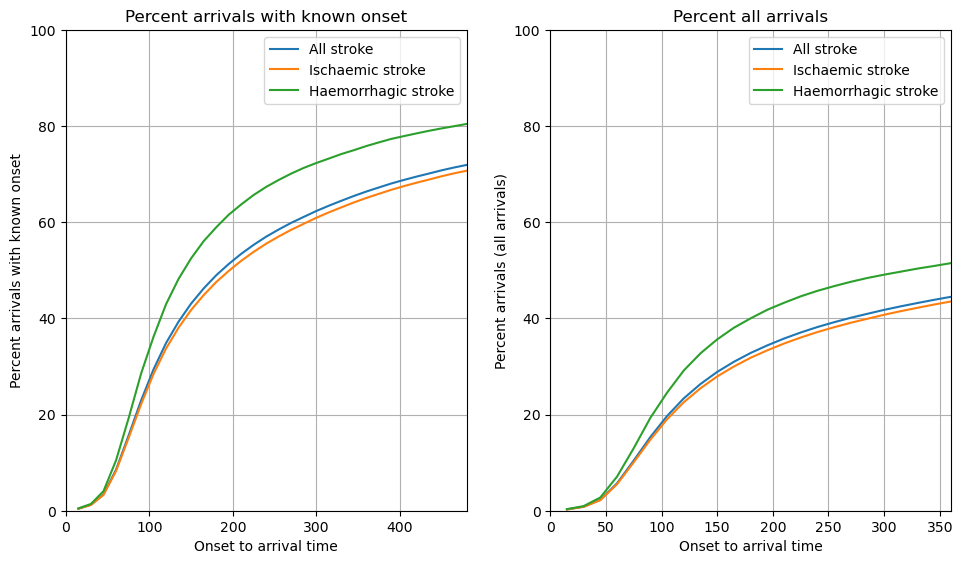

In [9]:
fig = plt.figure(figsize=(10,6))
ax = fig.add_subplot(121)
ax.plot(all_arrival_times, label = 'All stroke')
ax.plot(ischaemic_arrival_times, label = 'Ischaemic stroke')
ax.plot(haemorrhagic_arrival_times, label = 'Haemorrhagic stroke')

ax.set_xlim(0,480)
ax.set_ylim(0,100)
ax.set_xlabel('Onset to arrival time')
ax.set_ylabel('Percent arrivals with known onset')
ax.set_title('Percent arrivals with known onset')
ax.legend()
ax.grid()

ax = fig.add_subplot(122)
ax.plot(all_arrival_times * all_onset_known, label = 'All stroke')
ax.plot(ischaemic_arrival_times * ischaemic_onset_known, label = 'Ischaemic stroke')
ax.plot(haemorrhagic_arrival_times * haemorrhagic_onset_known, label = 'Haemorrhagic stroke')
ax.set_xlim(0,360)
ax.set_ylim(0,100)
ax.set_xlabel('Onset to arrival time')
ax.set_ylabel('Percent arrivals (all arrivals)')
ax.legend()
ax.grid()
ax.set_title('Percent all arrivals')

plt.tight_layout(pad=2)
plt.show()

Figure - all stroke

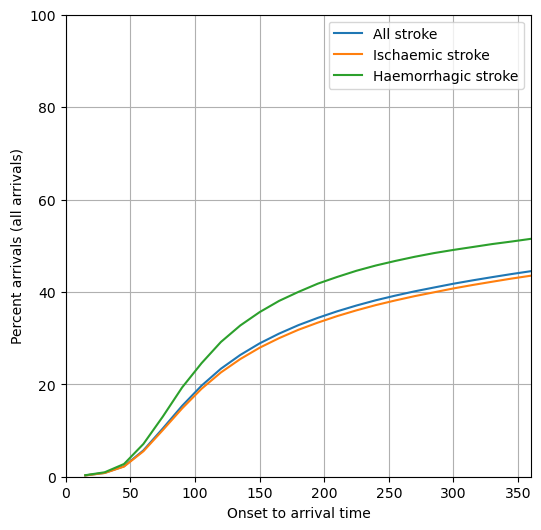

In [10]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(111)
ax.plot(all_arrival_times * all_onset_known, label = 'All stroke')
ax.plot(ischaemic_arrival_times * ischaemic_onset_known, label = 'Ischaemic stroke')
ax.plot(haemorrhagic_arrival_times * haemorrhagic_onset_known, label = 'Haemorrhagic stroke')
ax.set_xlim(0,360)
ax.set_ylim(0,100)
ax.set_xlabel('Onset to arrival time')
ax.set_ylabel('Percent arrivals (all arrivals)')
ax.legend()
ax.grid()
plt.show()

Save results

In [11]:
results = results.round(2)
results.to_csv('./output/onset_to_arrival.csv', index_label='time (mins)')